<a href="https://colab.research.google.com/github/ioriNa/DLfromZERO_julia/blob/main/DLfromZERO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia"'

In [ ]:
!julia -e 'using Pkg; pkg"add Plots; add PyPlot; add MLDatasets; add Images; add PyCall; add HTTP"'

上記をshift+enterで実行後、「ランタイム」->「ランタイムのタイプを変更」->「保存」を押してください。

In [ ]:
versioninfo()

Julia Version 1.6.1
Commit 6aaedecc44 (2021-04-23 05:59 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, haswell)


以上はcolabでjuliaを使うための設定。

以下が「ゼロから作るDeep Learning」（3章）のコード（julia）のみ

# 3章　ニューラルネットワーク

## 3.2 活性化関数

### 3.2.2 ステップ関数

In [ ]:
function step_function(x)
    if x > 0
        return 1
    else 
        return 0
    end
end

step_function (generic function with 1 method)

In [ ]:
x = [-1, 1, 2]
step_function.(x) 
#juliaでは”<関数名>.(<配列>)”とすることで配列を関数の引数にできるので、教科書みたいなことしなくても大丈夫

3-element Vector{Int64}:
 0
 1
 1

In [ ]:
# 簡単にする
function step_function(x)
    return 1 * (x > 0)
end

step_function (generic function with 1 method)

In [ ]:
# さらに簡単に定義
step_function(x) = (x <= 0 ? 0 : 1)

step_function (generic function with 1 method)

### 3.2.3 ステップ関数のグラフ

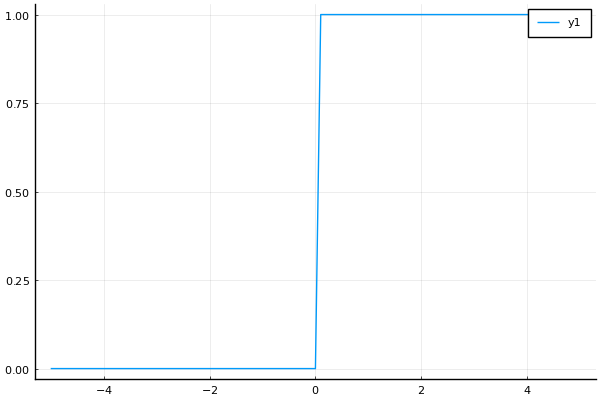

In [ ]:
using Plots

x = collect(-5.0:0.1:5.0)
y = step_function.(x)

pyplot()
plot(x, y)

### 3.2.4 シグモイド関数の実装

In [ ]:
sigmoid(x) = 1/(1 + exp(-x))

sigmoid (generic function with 1 method)

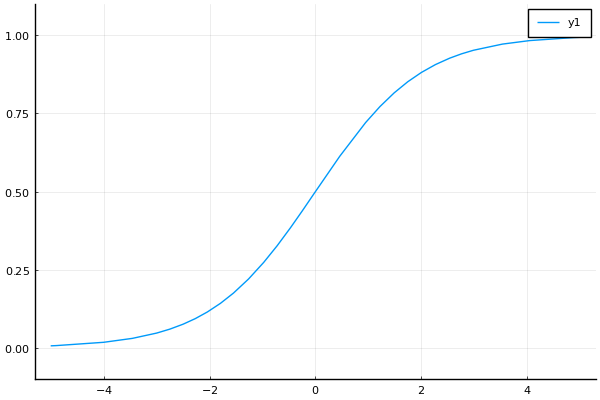

In [ ]:
plot(sigmoid, ylims = (-0.1, 1.1)) #関数がわかればplotできる

### 3.2.5 シグモイド関数とステップ関数の比較

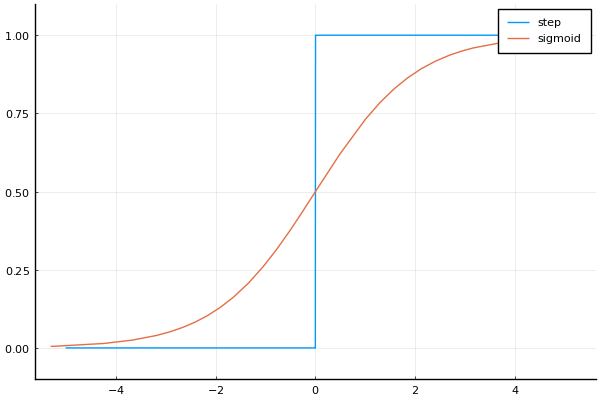

In [ ]:
plot(step_function, label = "step")
plot!(sigmoid, ylims = (-0.1, 1.1), label = "sigmoid") #"plot!(<function>)"で前のプロットに重ねてプロットできる

### 3.2.7 ReLU関数

In [ ]:
relu(x) = (x <= 0 ? 0 : x)

relu (generic function with 1 method)

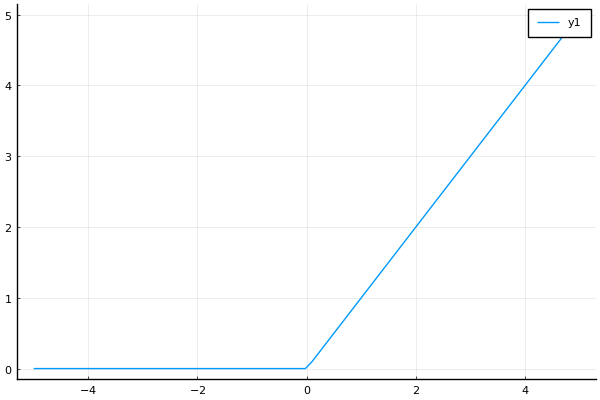

In [ ]:
plot(relu)

## 3.3 多次元配列の計算

### 3.3.1 多次元配列

In [ ]:
A = [1, 2, 3, 4]　# 本と同じ結果を返す書き方をする(列ベクトル = N*1行列)

println(A)
println(ndims(A))
println(size(A))
println(size(A, 1)) # juliaのスタートは1から

[1, 2, 3, 4]
1
(4,)
4


In [ ]:
A = [1 2 3 4]　#行ベクトル(= １＊Nの行列)なので注意してね

println(A)
println(ndims(A)) 
println(size(A))

[1 2 3 4]
2
(1, 4)


In [ ]:
B = [1 2; 3 4; 5 6]

println(B)
println(ndims(B))
println(size(B))

[1 2; 3 4; 5 6]
2
(3, 2)


### 3.3.2 行列の積

In [ ]:
A = [1 2; 3 4]
println(size(A))

B = [5 6; 7 8]
println(size(B))

println(A*B) #行列の積

(2, 2)
(2, 2)
[19 22; 43 50]


In [ ]:
A = [1 2 3; 4 5 6]
println(size(A))

B = [1 2; 3 4; 5 6]
println(size(B))

println(A*B) #行列の積

(2, 3)
(3, 2)
[22 28; 49 64]


In [ ]:
C = [1 2; 3 4]
println(size(C))

println(size(A))

A*C #ちゃんと（DimensionMismatch）とエラーが出る。

(2, 2)
(2, 3)


LoadError: ignored

In [ ]:
A = [1 2; 3 4; 5 6]
println(size(A))

B = [7, 8]
println(size(B))

println(A*B) #行列の積

(3, 2)
(2,)
[23, 53, 83]


### 3.3.3 ニューラルネットワークの行列の積

In [ ]:
X = [1 2] #行ベクトルであることに注意。列ベクトルだと次元不一致が起こる
println(size(X))

W = [1 3 5; 2 4 6]
println(W)
println(size(W))

Y = X*W
print(Y)

(1, 2)
[1 3 5; 2 4 6]
(2, 3)
[5 11 17]

## 3.4 3層ニューラルネットワークの実装

### 3.4.2 各層における信号伝達の実装

In [ ]:
X = [1.0 0.5]
W1 = [0.1 0.3 0.5; 0.2 0.4 0.6]
B1 = [0.1 0.2 0.3]
println(size(W1))
println(size(X))
println(size(B1))

A1 = X*W1 + B1
Z1 = sigmoid.(A1)
println(A1)
println(Z1)

(2, 3)
(1, 2)
(1, 3)
[0.30000000000000004 0.7 1.1]
[0.574442516811659 0.6681877721681662 0.7502601055951177]


In [ ]:
W2 = [0.1 0.4; 0.2 0.5; 0.3 0.6]
B2 = [0.1 0.2]
println(size(W2))
println(size(Z1))
println(size(B2))

A2 = Z1*W2 + B2
Z2 = sigmoid.(A2)
println(A2)
println(Z2)

(3, 2)
(1, 3)
(1, 2)
[0.5161598377933344 1.2140269561658172]
[0.6262493703990729 0.7710106968556123]


In [ ]:
identity_function(x) = x

W3 = [0.1 0.3; 0.2 0.4]
B3 = [0.1 0.2]

A3 = Z2*W3 + B3
Y = identity_function.(A3)

1×2 Matrix{Float64}:
 0.316827  0.696279

### 3.4.3 実装のまとめ

In [ ]:
function init_network()
    network = Dict()
    network["W1"] = [0.1 0.3 0.5; 0.2 0.4 0.6]
    network["b1"] = [0.1 0.2 0.3]
    network["W2"] = [0.1 0.4; 0.2 0.5; 0.3 0.6]
    network["b2"] = [0.1 0.2]
    network["W3"] = [0.1 0.3; 0.2 0.4]
    network["b3"] = [0.1 0.2]

    return network
end

function forward(network, x)
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = x*W1 + b1
    z1 = sigmoid.(a1)
    a2 = z1*W2 + b2
    z2 = sigmoid.(a2)
    a3 = z2*W3 + b3
    y = identity_function.(a3)

    return y
end

forward (generic function with 1 method)

In [ ]:
network = init_network()
x = [1.0 0.5]

y = forward(network, x)
println(y)

[0.3168270764110298 0.6962790898619668]


## 3.5 出力層の設計

### 3.5.1 恒等関数とソフトマックス関数

In [ ]:
a = [0.3 2.9 4.0]

exp_a = exp.(a)
println(exp_a)

sum_exp_a = sum(exp_a)
println(sum_exp_a)

y = exp_a/sum_exp_a
println(y)

[1.3498588075760032 18.17414536944306 54.598150033144236]
74.1221542101633
[0.018211273295547534 0.2451918129350739 0.7365969137693785]


In [ ]:
softmax(a) = exp.(a)/sum(exp.(a))

softmax (generic function with 1 method)

### 3.5.2 ソフトマックス関数の実装上の注意

In [ ]:
a = [1010 1000 990]
exp.(a)/sum(exp.(a))

1×3 Matrix{Float64}:
 NaN  NaN  NaN

In [ ]:
c = maximum(a)
println(a.- c)

exp.(a.- c)/sum(exp.(a.- c))

[0 -10 -20]


1×3 Matrix{Float64}:
 0.999955  4.53979e-5  2.06106e-9

In [ ]:
softmax(a) = exp.(a.- maximum(a))/sum(exp.(a.- maximum(a)))

softmax (generic function with 1 method)

### 3.5.3 ソフトマックス関数の特徴

In [ ]:
a = [0.3 2.9 4.0]
println(size(a))
y = softmax(a)
println(y)

println(sum(y))

(1, 3)
[0.01821127329554753 0.24519181293507392 0.7365969137693786]
1.0


## 3.6 手書き数字認識

### 3.6.1 MNISTデータセット

In [ ]:
# MLDatasetsパッケージのMNISTSデータセットを使う
using MLDatasets

# 訓練用画像データと教師データをロード
## train_x: 特徴量＝<画像データ｜28x28 グレースケール画像 60,000枚>{28x28x60000 Array{UInt8, 3}}
## train_y: 目的変数＝<数値クラス｜[0..9]の数値 60,000個>{60000 Array{Int, 1}}
train_x, train_t = MNIST.traindata()

# test用画像データと答えデータをロード
## train_x: 特徴量＝<画像データ｜28x28 グレースケール画像 10,000枚>{28x28x10000 Array{UInt8, 3}}
## train_y: 目的変数＝<数値クラス｜[0..9]の数値 10,000個>{10000 Array{Int, 1}}
test_x,  test_t  = MNIST.testdata()

println(size(train_x))
println(size(train_t))
println(size(test_x))
println(size(test_t))

This program has requested access to the data dependency MNIST.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: THE MNIST DATABASE of handwritten digits
Authors: Yann LeCun, Corinna Cortes, Christopher J.C. Burges
Website: http://yann.lecun.com/exdb/mnist/

[LeCun et al., 1998a]
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner.
    "Gradient-based learning applied to document recognition."
    Proceedings of the IEEE, 86(11):2278-2324, November 1998

The files are available for download at the offical
website linked above. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of MNIST aren't really
explicit about any terms of use, so please read the
website to make sure you want to download the
dataset.



Do you want to download the dataset from ["https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz", "https://ossci-datasets.s3.amazonaws.com/mn

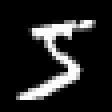

In [ ]:
# 一枚目の画像データ(28x28)をプロット
## 縦軸と横軸が反転しているため転置行列"<行列>’"を渡す
using Images
#img = convert(Array{RGB{Float32},2},train_x[:, :, 1]')
img =  MNIST.convert2image(train_x[:, :, 1])

In [ ]:
# 一枚目の画像に描かれている数字
train_t[1]

5

### 3.6.2 ニューラルネットワークの推論処理


In [ ]:
function get_data()
    x_test, t_test = MNIST.testdata()
    return x_test, t_test
end

using PyCall, HTTP
@pyimport pickle
function init_network()
    return pickle.loads(HTTP.request("GET", "https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl?raw=true").body)
end

function predict(network, x)
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = x'*W1 + b1'
    z1 = sigmoid.(a1)
    a2 = z1*W2 + b2'
    z2 = sigmoid.(a2)
    a3 = z2*W3 + b3'
    y = softmax(a3)

    return y
end

sigmoid(x) = 1/(1 + exp(-x))
softmax(a) = exp.(a.- maximum(a))/sum(exp.(a.- maximum(a)))

get_data (generic function with 1 method)

In [ ]:
x, t = get_data()
x = (reshape(x, (784, :)))' #行列の演算の次元を合わせる
network = init_network()

accuracy_cnt = 0
for i in 1:length(x[: ,1])
    y = predict(network, x[i, :])
    p = findmax(y)[2][2] -1  #(-1)はjuliaのインデックスが1から始まるため  

    if p - t[i]< 0.5 && p - t[i]> -0.5
        accuracy_cnt += 1
    end
end

print("Accuracy: $(accuracy_cnt/length(x[:, 1]))") # "$<float,int>"で数値を文章中”<文>”の間に入れられる。

Accuracy: 0.9352

### 3.6.3 バッチ処理

In [ ]:
x, _ = get_data()
x = (reshape(x, (784, :)))'

network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

println(size((x[1, :])'))
println(size(W1))
println(size(W2))
println(size(W3))

(1, 784)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
#　変更する関数はpredictのみ
function predict_batch(network, x) #最初のｘの転置とバイアスの足し算のところの変更のみ
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = x*W1 .+ b1'    # x' -> x /# + -> .+
    z1 = sigmoid.(a1)
    a2 = z1*W2 .+ b2'   # + -> .+
    z2 = sigmoid.(a2)
    a3 = z2*W3 .+ b3'   # + -> .+
    y = softmax(a3)

    return y
end

softmax (generic function with 1 method)

In [ ]:
# 変更したところは、バッチ数のところとforの部分
x, t = get_data()
x = (reshape(x, (784, :)))' 
network = init_network()

batch_size = 100 # バッチ数
accuracy_cnt = 0

for i in 1:batch_size:length(x[: ,1])  
    x_batch = x[i:i+batch_size-1, : ]   
    y_batch = predict_batch(network, x_batch)
    p = [findmax(y_batch[j, :])[2]-1 for j in 1:batch_size]

    accuracy_cnt += sum(p .== t[i:i+batch_size-1])
end

print("Accuracy: $(accuracy_cnt/length(x[:, 1]))")

Accuracy: 0.9352

おまけ

batch処理で早くなっているの？

In [ ]:
#no batch
@time for i in 1:length(x[: ,1])
    y = predict(network, x[i, :])
    p = findmax(y)[2][2] -1   
    if p - t[i]< 0.5 && p - t[i]> -0.5
        accuracy_cnt += 1
    end
end

  0.462155 seconds (307.96 k allocations: 71.390 MiB, 20.15% gc time)


In [ ]:
#batch
batch_size = 100
@time for i in 1:batch_size:length(x[: ,1])  
    x_batch = x[i:i+batch_size-1, : ]   
    y_batch = predict_batch(network, x_batch)
    p = [findmax(y_batch[j, :])[2]-1 for j in 1:batch_size]

    accuracy_cnt += sum(p .== t[i:i+batch_size-1])
end

  1.022489 seconds (4.88 k allocations: 26.793 MiB)


バッチ処理で遅くなっている（？）
まだこの大きさの行列だと恩恵を受けていないのか